#  여러 weak classifiers와 boosting 예측

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 1. 데이터 생성

(100, 1) (100,)


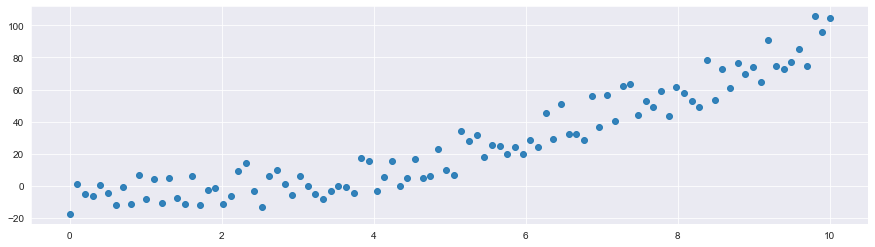

In [3]:
sns.set_style("darkgrid")
n = 100
X = np.linspace(0, 10, n) 

y = X**2 + 10 - (30 * np.random.random(n))
X = X.reshape(-1,1) # X[:, np.newaxis]
print(X.shape, y.shape)

plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.9);

### 2. Bootstrap sample 생성(사용자정의 함수)
#### 2.1 모집단(X)의 80%(100개 중 80개)를 복원추출로 1개의 재표본 생성(resample)

In [4]:
from sklearn.utils import resample
n_sample = int(len(X)*0.8)
boot = resample(np.squeeze(X), replace=True, n_samples=n_sample)

In [5]:
print(f'bootstrappin Sample: {boot} 부트스트랩 데이터의 크기는 {len(boot)}개')

bootstrappin Sample: [0.50505051 6.26262626 7.47474747 0.         4.54545455 5.45454545
 7.27272727 7.17171717 1.71717172 5.05050505 5.65656566 4.24242424
 8.08080808 7.07070707 6.46464646 9.29292929 5.15151515 1.81818182
 8.18181818 3.43434343 4.94949495 8.78787879 8.98989899 7.37373737
 4.44444444 0.1010101  4.54545455 6.06060606 8.28282828 3.63636364
 1.41414141 7.47474747 8.48484848 9.09090909 9.6969697  6.76767677
 2.42424242 1.71717172 9.09090909 0.80808081 5.95959596 1.61616162
 0.4040404  8.98989899 1.21212121 7.77777778 7.07070707 3.43434343
 0.70707071 4.84848485 6.96969697 9.09090909 4.54545455 0.1010101
 4.94949495 9.5959596  0.50505051 6.96969697 1.61616162 0.4040404
 8.78787879 4.54545455 6.36363636 8.38383838 1.81818182 8.08080808
 6.76767677 8.08080808 3.43434343 1.91919192 0.3030303  9.5959596
 6.06060606 6.76767677 1.01010101 0.3030303  4.74747475 7.77777778
 8.68686869 3.73737374] 부트스트랩 데이터의 크기는 80개


#### 부트스트래핑 재표본에 포함되지 않은 oob(out of bag) 표본 확인

In [6]:
oob = [x.round(2) for x in np.squeeze(X) if x not in boot]
print(f'OOB(Out of Bags) Sample: {oob}, oob데이터의 개수는 {len(oob)}개')

OOB(Out of Bags) Sample: [0.2, 0.61, 0.91, 1.11, 1.31, 1.52, 2.02, 2.12, 2.22, 2.32, 2.53, 2.63, 2.73, 2.83, 2.93, 3.03, 3.13, 3.23, 3.33, 3.54, 3.84, 3.94, 4.04, 4.14, 4.34, 4.65, 5.25, 5.35, 5.56, 5.76, 5.86, 6.16, 6.57, 6.67, 6.87, 7.58, 7.68, 7.88, 7.98, 8.59, 8.89, 9.19, 9.39, 9.49, 9.8, 9.9, 10.0], oob데이터의 개수는 47개


#### 2.2 모집단(X)의 80%(100개 중 80개)를 복원추출로 n개(100개)의 재표본 생성(resample)

In [29]:
from sklearn.utils import resample

def bootstrap(X, boots_iters, boots_size):
    boots_samples = []
    boots_size = int(len(X)*0.8)
    for sample in range(boots_iters) :
        boot = resample(np.squeeze(X), replace=True, n_samples=boots_size) # reshape(-1,1) 복원, 축을 1개 없앰             
        boots_samples.append(boot)
        
    oob = [x.round(2) for x in np.squeeze(X) if x not in boot]
    print(f'OOB(Out of Bags) 데이터의 개수는 : {len(oob)}개')
    
    return boots_samples

모집단 100개에서 80개씩 100회의 재표본 부트스트래핑을 한 결과

In [30]:
population = X        # 모집단
freq_resample = 100    # 재표본 반복 회수
ratio = 0.8           # 재표본 크기 (모집단 대비 비율)
boots_samples = bootstrap(population, freq_resample, ratio)
print(f'부트스트랩 재표본 데이터의 개수는 : {len(boots_samples)}개')

OOB(Out of Bags) 데이터의 개수는 : 46개
부트스트랩 재표본 데이터의 개수는 : 100개


#### 2.3 중심극한 정리 확인

In [32]:
data = pd.DataFrame(boots_samples)
data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.202020,0.606061,3.434343,7.777778,5.353535,6.363636,3.232323,3.737374,5.454545,6.464646,...,5.656566,9.898990,8.989899,9.090909,3.535354,2.727273,8.080808,3.939394,2.929293,0.303030
1,9.191919,5.656566,5.757576,4.141414,8.181818,6.969697,8.989899,2.727273,0.202020,7.979798,...,8.383838,7.171717,7.171717,6.262626,1.717172,4.242424,3.131313,9.191919,3.636364,4.040404
2,4.040404,1.717172,1.919192,6.666667,0.707071,4.242424,8.686869,1.212121,9.797980,9.797980,...,8.989899,6.666667,4.242424,1.515152,7.070707,5.454545,2.121212,0.606061,7.272727,1.717172
3,9.696970,8.686869,4.646465,8.686869,9.090909,7.676768,5.858586,5.959596,0.202020,1.616162,...,4.242424,2.727273,5.757576,9.595960,6.363636,4.242424,0.707071,7.070707,2.525253,7.575758
4,7.373737,3.131313,8.181818,3.939394,4.444444,4.848485,8.686869,0.404040,5.656566,7.171717,...,1.919192,5.656566,2.626263,8.888889,3.232323,6.262626,2.222222,8.181818,4.747475,6.161616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.262626,0.808081,6.161616,1.818182,2.222222,7.373737,7.575758,3.535354,6.565657,0.707071,...,5.454545,0.000000,9.393939,3.939394,0.505051,0.909091,1.616162,1.414141,3.939394,1.313131
96,7.777778,4.242424,4.747475,9.393939,1.616162,0.707071,2.525253,7.676768,2.020202,7.272727,...,4.545455,3.737374,9.494949,0.707071,8.989899,0.101010,8.383838,1.414141,8.484848,6.060606
97,0.404040,7.272727,3.838384,9.696970,7.272727,6.868687,4.141414,8.181818,6.363636,3.838384,...,4.545455,8.888889,2.020202,1.717172,8.888889,9.797980,1.313131,5.858586,9.494949,5.959596
98,3.939394,7.171717,8.181818,7.272727,2.828283,6.161616,4.949495,1.313131,9.191919,4.242424,...,0.404040,6.161616,3.737374,8.989899,3.030303,0.000000,0.606061,0.303030,7.070707,5.858586


In [33]:
print(f'중심극한정리에 따르면 모집단에서 표본 추출 회수가 {freq_resample}회로 충분히 크다면,')
print(f'100회 표본의 평균 {data.mean().mean()}은 모집단의 평균 {population.mean()}에 수렴하게 된다.')
(population.mean())
data.mean().mean()

중심극한정리에 따르면 모집단에서 표본 추출 회수가 100회로 충분히 크다면,
100회 표본의 평균 4.959292929292927은 모집단의 평균 5.0에 수렴하게 된다.


5.0

4.959292929292927

In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.210101,4.949495,4.706061,4.833333,5.450505,5.016162,4.523232,4.966667,5.129293,5.222222,...,4.474747,4.687879,4.969697,4.654545,4.880808,4.585859,5.296970,4.552525,4.473737,4.879798
std,3.119134,2.938935,2.997582,2.830882,2.882349,3.002361,2.916002,2.985488,3.028281,2.976480,...,2.928096,2.947237,2.978401,2.830202,2.885064,2.997647,3.123893,2.784740,2.874378,3.055390
min,0.000000,0.000000,0.202020,0.000000,0.000000,0.202020,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.202020,0.101010,0.000000,0.000000,0.000000,0.000000,0.000000,0.101010
25%,2.979798,2.601010,1.994949,2.525253,3.207071,2.449495,2.020202,2.297980,2.222222,2.398990,...,1.717172,2.121212,2.398990,2.525253,2.702020,1.919192,2.500000,1.792929,1.893939,2.020202
50%,5.353535,5.050505,4.646465,4.848485,5.656566,4.797980,4.595960,5.202020,5.151515,5.252525,...,4.292929,4.949495,4.949495,4.141414,4.646465,4.545455,5.404040,4.545455,3.888889,4.747475
75%,7.904040,7.474747,7.196970,7.297980,7.601010,7.676768,6.767677,7.070707,7.676768,7.803030,...,6.919192,7.272727,7.777778,6.969697,7.272727,7.121212,8.131313,6.994949,6.767677,7.727273
max,10.000000,9.898990,10.000000,10.000000,10.000000,9.898990,10.000000,10.000000,10.000000,10.000000,...,9.898990,9.696970,10.000000,10.000000,10.000000,9.797980,10.000000,9.898990,9.898990,9.797980


- 사용자정의함수 괄호 안의 인자는 사전에 인자를 정하지 않는 경우
     * 일반 인자(*arg)와 키워드 인자(**kwarg)를 사용
- 일반 인자(*arg)와 달리 키워드 인자(**kwarg)는 파이썬의 사전(dictionary)자료 형태인 key와 value를 아는 경우이다

In [12]:
def catch_all(*args, **kwargs):
    print("args =", args)
    print("kwargs =", kwargs)

In [13]:
catch_all(1, 2, 3, 4, a=7, b=5)

args = (1, 2, 3, 4)
kwargs = {'a': 7, 'b': 5}


In [14]:
catch_all('a',keyword=2)

args = ('a',)
kwargs = {'keyword': 2}


### 3. Stumps 생성 및 예측
#### 3.1 bootstrap 표본 수만큼의 stumps(many weak trees)를 생성

In [15]:
def many_trees(n_trees, **kwargs):
    trees = [DecisionTreeRegressor(**kwargs) for i in range(n_trees)]
    return trees

In [16]:
learners = many_trees(freq_resample, max_depth=1)
len(learners)

100

#### 3.2. bootstrap 표본에 stumps(알고리즘) fit
<font color ='red'> Function gradient descent method (Not parameter gradient descent method)

In [17]:
def boost(trees, X, y, clf=False):
    fitted = []
    for tree in trees:
        tree.fit(X, y)
        yhat = tree.predict(X)
        y = (y-yhat) 
        fitted.append(tree)
    return fitted

In [18]:
fitted = boost(learners, X, y, clf=False)
len(fitted )
fitted[0:5]

100

[DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1)]

#### 3.3. 데이터 예측(Predict)

In [19]:
def prediction(trees, X):
    return np.array([tree.predict(X) for tree in trees]).T

### smaple100개에 대해 30번의 boosting 예측 결과(잔차 예측)

In [20]:
boosted_yhat = prediction(fitted, X)
boosted_yhat.shape

(100, 100)

In [21]:
data = pd.DataFrame(boosted_yhat)
data.loc['sum of residuals for all learners'] = data.sum(1)
data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,4.757604,-2.506954,-5.021115,4.393138,-1.788097,-4.669023,2.595231,-3.157835,1.786567,-0.412637,...,0.530721,-0.530721,0.550928,-0.587204,0.524469,-0.495166,0.483697,-0.397377,0.403578,-0.403578
1,4.757604,-2.506954,-5.021115,4.393138,-1.788097,-4.669023,2.595231,-3.157835,1.786567,-0.412637,...,0.530721,-0.530721,0.550928,-0.587204,0.524469,-0.495166,0.483697,-0.397377,0.403578,-0.403578
2,4.757604,-2.506954,-5.021115,4.393138,-1.788097,-4.669023,2.595231,-3.157835,1.786567,-0.412637,...,0.530721,-0.530721,0.550928,-0.587204,0.524469,-0.495166,0.483697,-0.397377,0.403578,-0.403578
3,4.757604,-2.506954,-5.021115,4.393138,-1.788097,-4.669023,2.595231,-3.157835,1.786567,-0.412637,...,0.530721,-0.530721,0.550928,-0.587204,0.524469,-0.495166,0.483697,-0.397377,0.403578,-0.403578
4,4.757604,-2.506954,-5.021115,4.393138,-1.788097,-4.669023,2.595231,-3.157835,1.786567,-0.412637,...,0.530721,-0.530721,0.550928,-0.587204,0.524469,-0.495166,0.483697,-0.397377,0.403578,-0.403578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,61.476993,25.348094,3.077458,-7.167751,8.730120,1.316904,-4.234325,2.914924,-2.914924,-0.412637,...,-0.216773,0.186470,-0.173977,0.165622,-0.165622,0.173977,-0.188105,0.243553,-0.269052,0.247354
97,61.476993,25.348094,3.077458,-7.167751,8.730120,1.316904,-4.234325,2.914924,-2.914924,13.341930,...,-0.216773,0.186470,-0.173977,0.165622,-0.165622,0.173977,-0.188105,0.243553,-0.269052,0.247354
98,61.476993,25.348094,3.077458,-7.167751,8.730120,1.316904,-4.234325,2.914924,-2.914924,13.341930,...,-0.216773,0.186470,-0.173977,0.165622,-0.165622,0.173977,-0.188105,0.243553,-0.269052,0.247354
99,61.476993,25.348094,3.077458,-7.167751,8.730120,1.316904,-4.234325,2.914924,-2.914924,13.341930,...,-0.216773,0.186470,-0.173977,0.165622,-0.165622,0.173977,-0.188105,0.243553,-0.269052,0.247354


그림생성을 위해 x축  생성

In [22]:
xfit = np.linspace(0, 10, 100).reshape(-1, 1)

최초 부터 마지막까지  최종 부스팅 결과 합을 그림

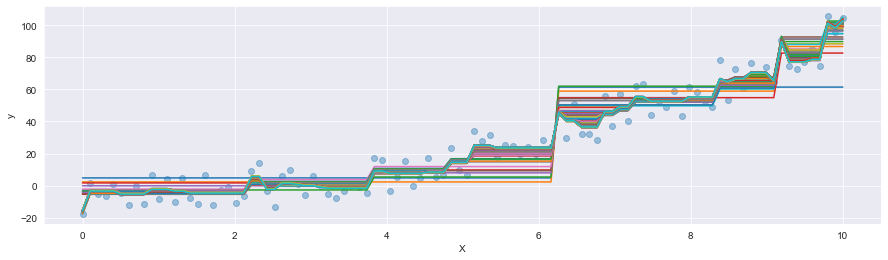

In [23]:
plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.4)
pred = 0
for i in range(len(learners)): # 30개 learners
    pred += boosted_yhat[:, i]
    plt.plot(xfit, pred)
plt.xlabel("X"); plt.ylabel("y");

잔차(실제값과 모델 예측 값의 차이) 그래프

<Figure size 1080x288 with 0 Axes>

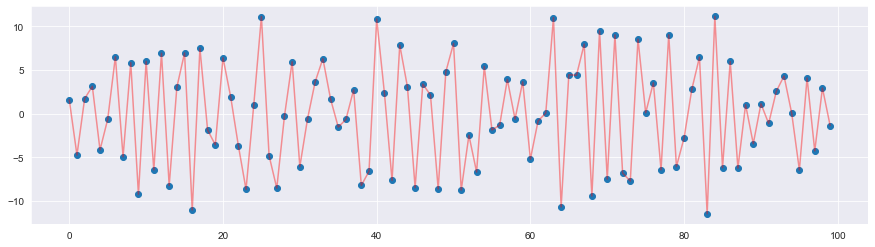

In [24]:
sample_ix = np.arange(X.shape[0])
plt.figure(figsize=(15, 4))
plt.scatter(sample_ix, pred-y)
plt.plot(pred-y, color='r', alpha=0.4)

In [25]:
def plot_fits(n_trees, row):
    preds_t = boosted_yhat[:, :n_trees]
    boosted_pred = preds_t.sum(1)
    res = boosted_pred-y
    axes[row, 0].plot(xfit, boosted_pred, c='red')
    axes[row, 0].scatter(X, y)
    axes[row, 0].set_title(f"Fit after {n_trees} trees", fontsize=15)
    axes[row, 1].scatter(sample_ix, res, alpha=0.7)
    axes[row, 1].plot(res, color='r', alpha=0.7)
    axes[row, 1].set_title(f"Residuals after {n_trees} trees", fontsize=15)

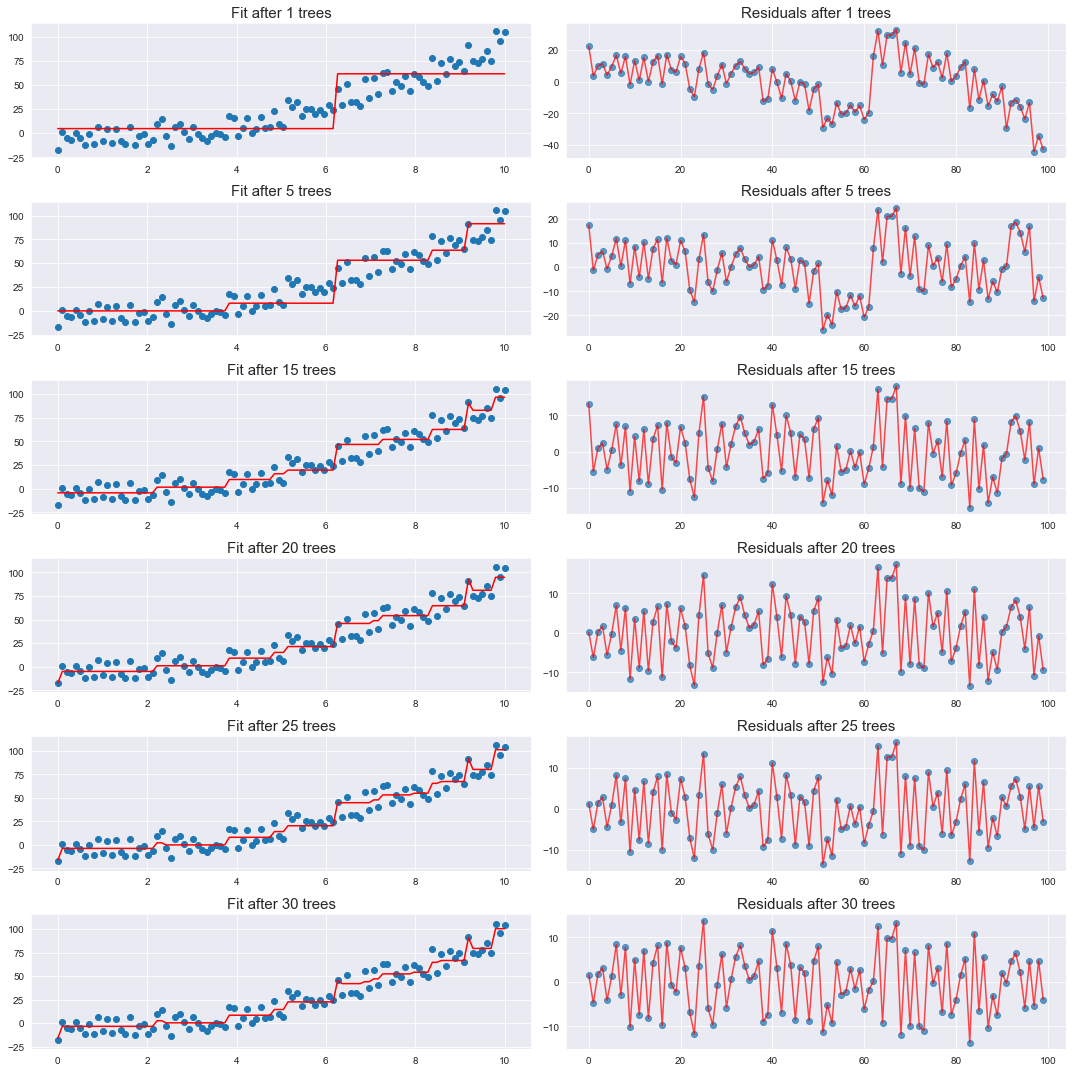

In [26]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,15))

plot_fits(1, 0)
plot_fits(5, 1)
plot_fits(15, 2)
plot_fits(20, 3)
plot_fits(25, 4)
plot_fits(30, 5)

fig.tight_layout()

# End